In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import cross_val_score

%matplotlib inline

C:\Users\jayan\Anaconda3\envs\accounting\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
data = pd.read_csv('D:/research-assistant/datasets/ml_dataset.csv')
data.head()

,Unnamed: 0,cik,size,ni,zscore,leverage,prloss,chgdt,cfo,liquidity,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,bankruptcy
0,0,1923,4.633233,-0.457,-1.379207,0.782724,1,0.0,0.068627,0.070678,...,0,0,0,0,0,0,0,0,0,False
1,1,1961,0.674983,-8.920,22.164456,2.979633,1,0.0,-2.646130,0.019348,...,0,0,0,0,0,0,0,0,0,False
2,2,2062,4.720426,2.224,0.000000,0.665966,1,0.0,-0.072984,0.066363,...,0,0,0,0,0,0,0,0,0,False
3,3,2186,2.913546,-1.428,-1.775756,0.654761,1,0.0,-0.023179,0.011291,...,0,0,0,0,0,0,0,0,0,False
4,4,2491,5.861604,-15.035,1.420819,1.140723,1,0.0,-0.008423,0.091219,...,0,0,0,0,0,0,0,0,0,False


In [19]:
def preprocessing (x):
    x = x.drop(columns = ['Unnamed: 0','cik'])
    shape = x.shape[1] - 1
    
    # Normalizing the data
    sc = StandardScaler()
    x.iloc[:,range(0,shape)] = sc.fit_transform(x.iloc[:,range(0,shape)])

    
    # splitting the dataset
    X = x.iloc[:,range(0,shape)]
    Y = x.iloc[:,shape]
    x_train,x_test, y_train,y_test = train_test_split( x.iloc[:,range(0,shape)], x.iloc[:,shape], random_state = 123, test_size = 0.30 )
    #print(x_train.head())
       
    #Training dataset
#     y_train = pd.DataFrame(y_train)
#     training = x_train.join(y_train)
    
#     #splitting the data 
#     data_majority = training[training['is_successful']==0]
#     data_minority = training[training['is_successful']==1]
    
#     #upsampling dataset
#     count = data_majority["is_successful"].value_counts()
#     count = count[0]
    
#     #upsample minority class
#     data_minority_upsampled = resample(data_minority,
#                                   replace = True,
#                                   n_samples = count,
#                                   random_state = 123)
#     df_upsampled = pd.concat([data_majority, data_minority_upsampled])
#     #print(df_upsampled.head())
#     y_upsampledtrain = df_upsampled["is_successful"]
#     x_upsampledtrain = df_upsampled.drop(columns = ["is_successful"], axis=1)
#     y_upsampledtrain = pd.DataFrame(y_upsampledtrain)
    
    print('Preprocessing Complete')
    return(X, x_train, x_test, Y, y_train, y_test )

In [20]:
X, x_train, x_test, Y, y_train, y_test = preprocessing(data)

Preprocessing Complete


0.9746102449888642
              precision    recall  f1-score   support

       False       0.97      1.00      0.99      2006
        True       0.99      0.77      0.87       239

    accuracy                           0.97      2245
   macro avg       0.98      0.88      0.93      2245
weighted avg       0.98      0.97      0.97      2245



C:\Users\jayan\Anaconda3\envs\accounting\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


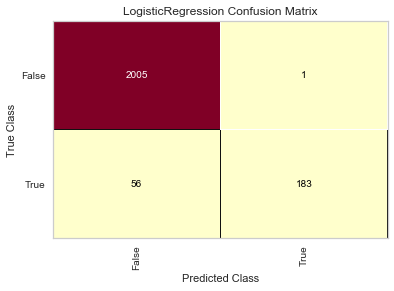

0.9740721192831294

In [21]:
## Logistic regression
logmodel = LogisticRegression(random_state=123)
logmodel.fit(x_train, y_train)
y_pred = logmodel.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
viz = ConfusionMatrix(logmodel)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()
scores = cross_val_score(logmodel, X, Y, cv=5)
scores.sum()/5

0.9804008908685968
              precision    recall  f1-score   support

       False       0.98      1.00      0.99      2006
        True       1.00      0.82      0.90       239

    accuracy                           0.98      2245
   macro avg       0.99      0.91      0.94      2245
weighted avg       0.98      0.98      0.98      2245



C:\Users\jayan\Anaconda3\envs\accounting\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


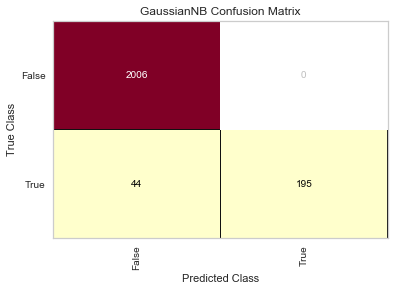

0.8248732759636921

In [22]:
# naive bayes classifier
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
viz = ConfusionMatrix(nb)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()
scores = cross_val_score(nb, X, Y, cv=5)
scores.sum()/5

0.9795100222717149
              precision    recall  f1-score   support

       False       0.98      1.00      0.99      2006
        True       0.99      0.81      0.89       239

    accuracy                           0.98      2245
   macro avg       0.99      0.91      0.94      2245
weighted avg       0.98      0.98      0.98      2245



C:\Users\jayan\Anaconda3\envs\accounting\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


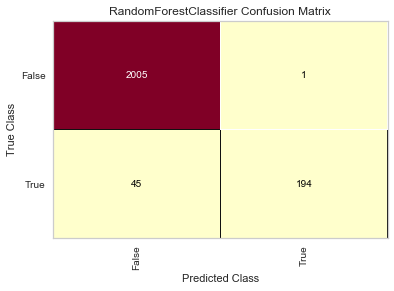

0.9782157898685071

In [23]:
rf_model = RandomForestClassifier(random_state = 123)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
viz = ConfusionMatrix(rf_model)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()
scores = cross_val_score(rf_model, X, Y, cv=5)
scores.sum()/5